# MNIST digits recognition

[Dataset page](http://yann.lecun.com/exdb/mnist/)

In [1]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

from mnist import MNIST

import matplotlib.pyplot as plt
%matplotlib inline

# Data reading

In [2]:
mndata = MNIST('./data/')

train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [7]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_labels), '\n')

print(type(train_images))
print(type(train_labels))
print(type(test_images))
print(type(test_labels))

60000
60000
10000
10000 

<class 'list'>
<class 'array.array'>
<class 'list'>
<class 'array.array'>


In [10]:
print(len(train_images[0]))
print(train_labels[0])
print(len(test_images[0]))
print(test_labels[0], '\n')

print(type(train_images[0]))
print(type(test_images[0]))

784
5
784
7 

<class 'list'>
<class 'list'>


In [16]:
pd.Series(train_labels).value_counts().sort_values()

5    5421
4    5842
8    5851
6    5918
0    5923
9    5949
2    5958
3    6131
7    6265
1    6742
dtype: int64

In [18]:
pd.Series(test_labels).value_counts().sort_values()

5     892
6     958
8     974
0     980
4     982
9    1009
3    1010
7    1028
2    1032
1    1135
dtype: int64

In [143]:
X_train, _, y_train, _ = train_test_split(train_images, train_labels, train_size=0.05,
                                    shuffle=True, stratify=train_labels, random_state=42)

/Users/nikolay/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [243]:
print(len(X_train))
print(len(y_train), '\n')

print(type(X_train))
print(type(y_train))

3000
3000 

<class 'list'>
<class 'list'>


# GridSearch 1

In [146]:
param_grid = {'n_neighbors': list(range(1, 30, 1)),
              'weights': ['uniform', 'distance'],
              'p': list(range(1, 6, 1))}

knn = KNeighborsClassifier(n_jobs=-1)

grid_search = GridSearchCV(knn, param_grid=param_grid, scoring='accuracy', n_jobs=-1,
                           cv=5, verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 290 candidates, totalling 1450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 69.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 168.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 303.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 475.7min
[Parallel(n_jobs=-1)]: Done 1450 out of 1450 | elapsed: 555.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [147]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.933
{'n_neighbors': 4, 'p': 4, 'weights': 'distance'}


In [182]:
cv_results = pd.DataFrame(grid_search.cv_results_)

uniform_df = cv_results[cv_results['param_weights'] == 'uniform']\
                            [['param_n_neighbors', 'param_p', 'mean_test_score']]
distance_df = cv_results[cv_results['param_weights'] == 'distance']\
                            [['param_n_neighbors', 'param_p', 'mean_test_score']]

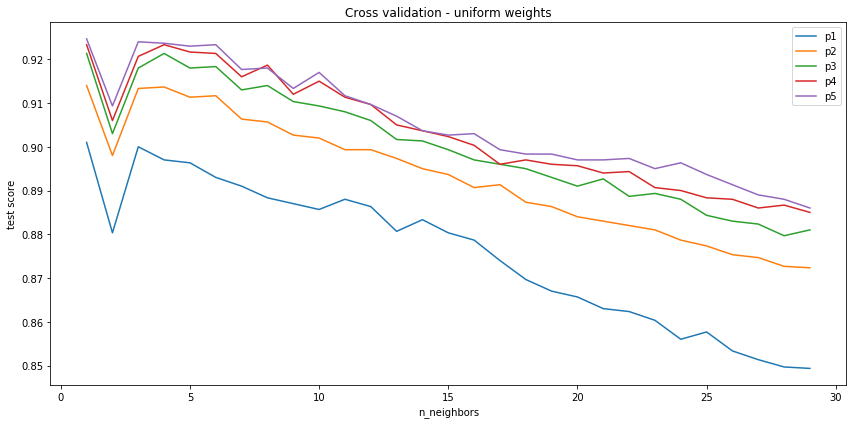

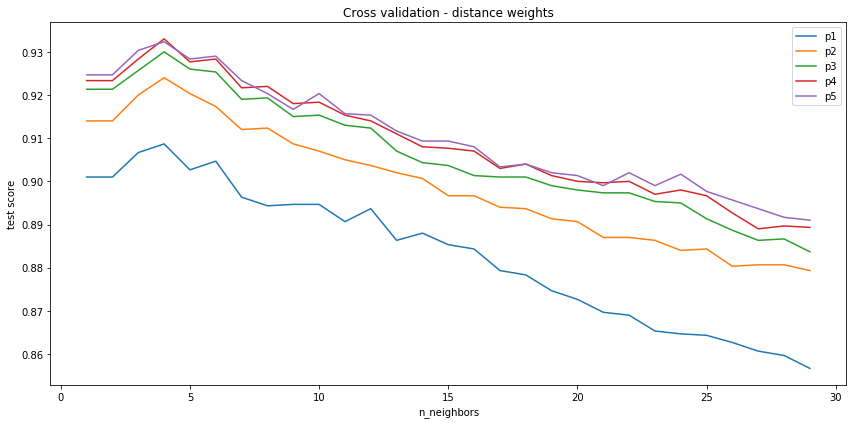

In [247]:
for weights_df, weights_title in zip([uniform_df, distance_df], ['uniform', 'distance']):    
    fig, ax = plt.subplots(figsize=(12, 6))

    for p in range(1, 6):
        df = weights_df[weights_df['param_p'] == p]
        plt.plot(df[['param_n_neighbors']], df[['mean_test_score']], label=('p' + str(p)))

    ax.set(title=('Cross validation - ' + weights_title + ' weights'), xlabel='n_neighbors', ylabel='test score')
    ax.legend()
    plt.tight_layout()

# GridSearch 2

In [188]:
param_grid2 = {'n_neighbors': list(range(2, 8, 1)),
               'p': list(range(3, 8, 1))}

knn2 = KNeighborsClassifier(weights='distance', n_jobs=-1)

grid_search2 = GridSearchCV(knn2, param_grid=param_grid2, scoring='accuracy', n_jobs=-1,
                            cv=5, verbose=1, return_train_score=True)
grid_search2.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 94.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7], 'p': [3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [189]:
print(grid_search2.best_score_)
print(grid_search2.best_params_)

0.937
{'n_neighbors': 4, 'p': 6}


In [191]:
cv_results = pd.DataFrame(grid_search2.cv_results_)

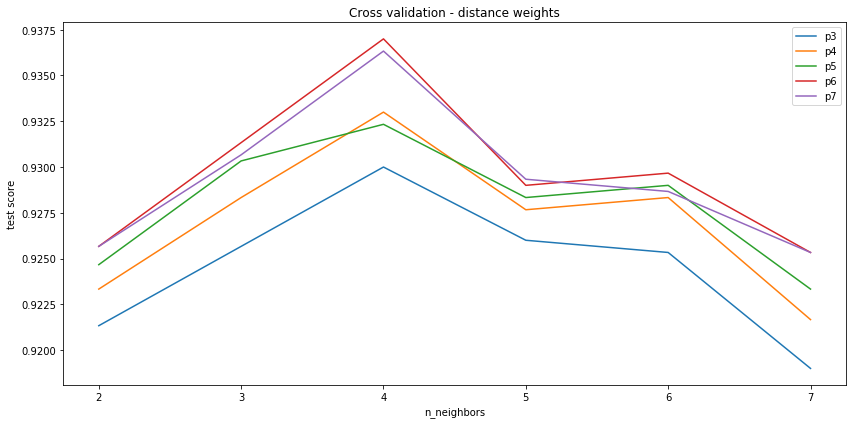

In [248]:
fig, ax = plt.subplots(figsize=(12, 6))

for p in range(3, 8):
    df = cv_results[cv_results['param_p'] == p]
    plt.plot(df[['param_n_neighbors']], df[['mean_test_score']], label=('p' + str(p)))

ax.set(title='Cross validation - distance weights', xlabel='n_neighbors', ylabel='test score')
ax.legend()
plt.tight_layout()

# Prediction

In [211]:
knn = KNeighborsClassifier(n_neighbors=4, weights='distance', p=6, n_jobs=-1)
knn.fit(train_images, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=6,
           weights='distance')

In [228]:
pred_labels = knn.predict(test_images)

In [242]:
print(accuracy_score(list(test_labels), pred_labels))

0.9763


### Accuracy score: 0.9763